In [2]:
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import tensorflow as tf  # add
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score

# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import zscore
import keras
import time

## Load Data Set

In [121]:
datafile = './housing.csv'
data = np.fromfile(datafile, sep=' ')
feature_num = 14
data = data.reshape([data.shape[0] // 14, 14])
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

## In order to avoid high biased situation, shuffle the data set

In [91]:
df = pd.DataFrame(data)
df = df.sample(frac=1)

data2 = df.to_numpy()

## Divide the data set into X and Y

In [92]:
x = []
for i in range(len(data)):
    temp = data[i][0:13].tolist()
    x.append(temp)

In [93]:
y = []
for j in range(len(data)):
    y.append(data[j][-1])

## Standardize the X

Here I do not standarize the Y variable, so that I can use MSE to judge whether the model is good or not. 

In [94]:
standar = StandardScaler()
standar.fit(x)
x = standar.transform(x)
x = x.tolist()


## Split the data set

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Build a one layer model for further use

I use a Sequential model with an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model1.

In [9]:
def build_model1():
    model = models.Sequential() 
    model.add(tf.keras.layers.Dense(64,
                                    activation="relu",
                                    #
                                    input_shape=(len(x_train[0]), )
                                   ))
    
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer="adam",
                  loss="mse",
                  metrics=["mse"]
                 )
    
    return model

## Build four layer NN

In [11]:


model1 = Sequential([
    Dense(64,activation="relu",input_shape=(13,),name="dense1"),
    Dense(32,activation="relu",name="dense2"),
    Dense(16,activation="relu",name="dense3"),
    Dense(1,name="dense4"),
])
model1.compile(optimizer="adam",loss="mse",metrics=['mae'])


Use the .summary method to print a simple description of the model

In [12]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 64)                896       
                                                                 
 dense2 (Dense)              (None, 32)                2080      
                                                                 
 dense3 (Dense)              (None, 16)                528       
                                                                 
 dense4 (Dense)              (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train the model for 500 epochs, and record the training accuracy in the history object.

In [13]:
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}|'
                  .format(epoch, t, logs['loss'], logs['val_loss']))
hist = model1.fit(x_train,y_train,batch_size=20,validation_data=(x_test,y_test),epochs=500,verbose=0,callbacks=[PrintLoss()])

| Epoch    0 | training time   0.38s | train loss 581.50 | validation loss 517.72|
| Epoch  100 | training time   6.07s | train loss   5.15 | validation loss  18.12|
| Epoch  200 | training time  11.80s | train loss   2.72 | validation loss  16.08|
| Epoch  300 | training time  17.50s | train loss   1.85 | validation loss  16.08|
| Epoch  400 | training time  23.34s | train loss   1.30 | validation loss  15.81|


## Test some data and give the predicted values

In [14]:
test = np.array([[-0.4197819386460084,
  0.2848298609673544,
  -1.2879094989577475,
  -0.27259856706992924,
  -0.144217432555303,
  0.4136718893017581,
  -0.12001341619804971,
  0.14021360349292894,
  -0.9828428567665052,
  -0.666608209021096,
  -1.4590003802772,
  0.4410519326070326,
  -1.0755623045678655],
 [-0.41733926449352865,
  -0.4877223646701278,
  -0.5933810131002412,
  -0.27259856706992924,
  -0.7402622069004924,
  0.19427445318162773,
  0.36716641853177473,
  0.5571598750882429,
  -0.867882504125763,
  -0.9873294849629973,
  -0.30309414801650136,
  0.4410519326070326,
  -0.49243936573529473],
 [-0.4173415919581808,
  -0.4877223646701278,
  -0.5933810131002412,
  -0.27259856706992924,
  -0.7402622069004924,
  1.2827136817256513,
  -0.26581176089821623,
  0.5571598750882429,
  -0.867882504125763,
  -0.9873294849629973,
  -0.30309414801650136,
  0.3964269940902556,
  -1.208727398772419],
 [-0.41675041593652307,
  -0.4877223646701278,
  -1.3068777139076375,
  -0.27259856706992924,
  -0.8352838375932031,
  1.0163025092940652,
  -0.8098885106329837,
  1.0777366189304818,
  -0.7529221514850205,
  -1.1061151427192575,
  0.11303209559734954,
  0.4161628391345306,
  -1.3615168226492225],
 [-0.41248184576439545,
  -0.4877223646701278,
  -1.3068777139076375,
  -0.27259856706992924,
  -0.8352838375932031,
  1.2285766520336718,
  -0.511179706857033,
  1.0777366189304818,
  -0.7529221514850205,
  -1.1061151427192575,
  0.11303209559734954,
  0.4410519326070326,
  -1.0265014803872405]])


model1.predict(test)

array([[21.64291 ],
       [22.26458 ],
       [32.02468 ],
       [34.263878],
       [35.01935 ]], dtype=float32)

## Real Value

In [183]:
y[:5]

[24.0, 21.6, 34.7, 33.4, 36.2]

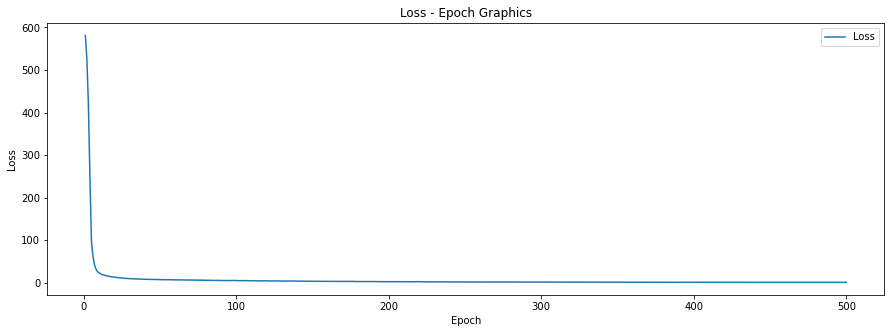

In [16]:
figure1 = plt.gcf()
figure1.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.legend(['Loss'])
plt.show()

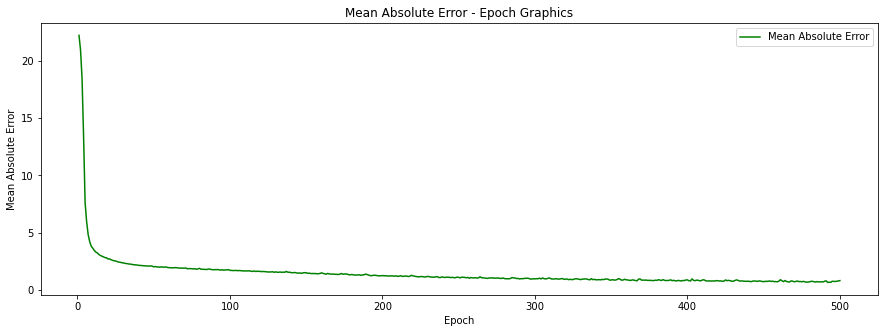

In [17]:
figure2 = plt.gcf()
figure2.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'],color = 'green')
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [107]:
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 2 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}|'
                  .format(epoch, t, logs['loss'], logs['val_loss']))
hist = model1.fit(x_train,y_train,batch_size=20,validation_data=(x_test,y_test),epochs=60,verbose=0,callbacks=[PrintLoss()])

| Epoch    0 | training time   0.29s | train loss 595.61 | validation loss 559.60|
| Epoch    2 | training time   0.38s | train loss 485.79 | validation loss 411.93|
| Epoch    4 | training time   0.48s | train loss 197.97 | validation loss 105.58|
| Epoch    6 | training time   0.57s | train loss  56.22 | validation loss  36.65|
| Epoch    8 | training time   0.67s | train loss  31.87 | validation loss  23.16|
| Epoch   10 | training time   0.77s | train loss  26.27 | validation loss  19.27|
| Epoch   12 | training time   0.86s | train loss  22.63 | validation loss  18.02|
| Epoch   14 | training time   0.96s | train loss  19.67 | validation loss  15.78|
| Epoch   16 | training time   1.06s | train loss  17.72 | validation loss  14.74|
| Epoch   18 | training time   1.16s | train loss  16.33 | validation loss  13.98|
| Epoch   20 | training time   1.26s | train loss  15.28 | validation loss  13.19|
| Epoch   22 | training time   1.35s | train loss  14.35 | validation loss  12.60|
| Ep

## Plot the epoch and loss diagram


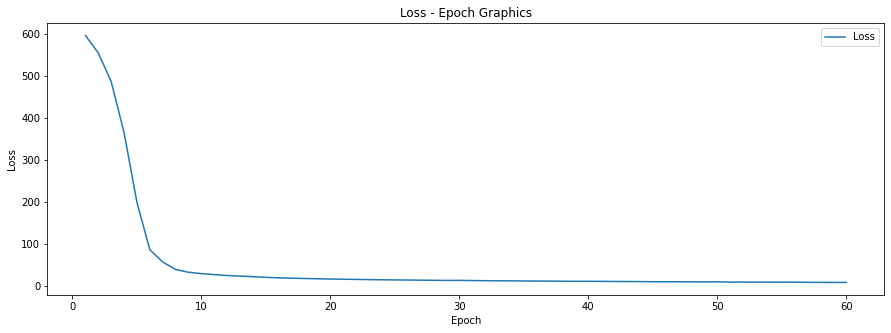

In [108]:
figure1 = plt.gcf()
figure1.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.legend(['Loss'])
plt.show()

## Plot the mean absolut error and epoch diagram

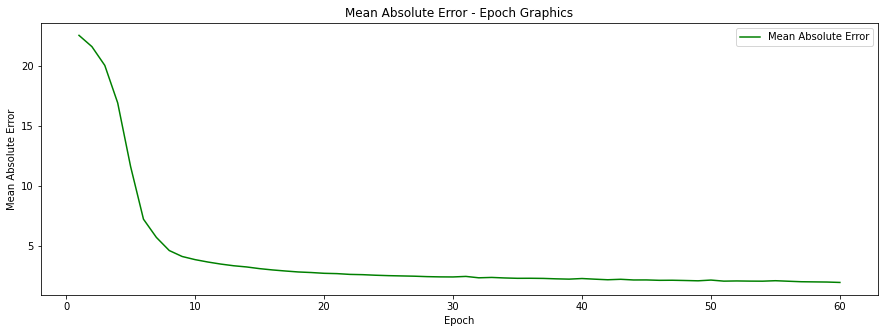

In [109]:
figure2 = plt.gcf()
figure2.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'],color = 'green')
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

# K-Fold evaluation

## Implementing K-Fold to evaluate the model

In [124]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
    
import keras
import tensorflow as tf
from sklearn.pipeline import make_pipeline

In [125]:
# load dataset
dataframe = pd.read_csv("./housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:, 0:13]
Y = dataset[:, 13]


standar = StandardScaler()
standar.fit(X)
X = standar.transform(X)
def build_model2():

    model = models.Sequential()
    model.add(tf.keras.layers.Dense(64,
                                    activation="relu",
                                    #
                                    input_shape=(13, )
                                   ))
    model.add(tf.keras.layers.Dense(32, 
                                    activation="relu"))
    model.add(tf.keras.layers.Dense(16, 
                                    activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer="adam",
                  loss="mse",
                  metrics=["mae"]
                 )
    
    return model

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [131]:
model = build_model2()
pipeline = make_pipeline(StandardScaler(),KerasRegressor(model = model, epochs=60, batch_size=20, verbose=0))
re_kfold = KFold(n_splits=10)

kfold = re_kfold.split(x_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    temp_train = train.tolist()
    
    pipeline.fit(x_train[temp_train, :], y_train[temp_train])
    score = pipeline.score(x_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score*100))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores)*100, np.std(scores)*100))

Fold:  1, Accuracy: 81.931
Fold:  2, Accuracy: 74.829
Fold:  3, Accuracy: 94.671
Fold:  4, Accuracy: 90.670
Fold:  5, Accuracy: 95.004
Fold:  6, Accuracy: 95.497
Fold:  7, Accuracy: 97.773
Fold:  8, Accuracy: 97.195
Fold:  9, Accuracy: 97.870
Fold: 10, Accuracy: 98.668


Cross-Validation accuracy: 92.411 +/- 7.509


In [140]:
kf = KFold(n_splits=10)
kf.get_n_splits(x)

#print(kf)

hist_dict = []

for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = [x[xIndice] for xIndice in train_index], [x[xIndice] for xIndice in test_index]
    y_train, y_test = [y[yIndice] for yIndice in train_index], [y[yIndice] for yIndice in test_index]
    
    #print(train_index,test_index)
    
    model = Sequential([
    Dense(64,activation="relu",input_shape=(13,),name="dense1"),
    Dense(32,activation="relu",name="dense2"),
    Dense(16,activation="relu",name="dense3"),
    Dense(1,name="dense5"),])
    
    model.compile(optimizer="adam",loss="mse",metrics=['mae'])
    model.fit(X_train,y_train,batch_size=20,validation_data=(X_test,y_test),epochs=60)
    hist_dict.append(model.history.history)
    


Epoch 1/60
23/23 [==============================] - 0s 5ms/step - loss: 561.1281 - mae: 21.6560 - val_loss: 379.6792 - val_mae: 18.6820
Epoch 2/60
23/23 [==============================] - 0s 2ms/step - loss: 442.5196 - mae: 18.6683 - val_loss: 261.0127 - val_mae: 15.4768
Epoch 3/60
23/23 [==============================] - 0s 2ms/step - loss: 255.4199 - mae: 13.5141 - val_loss: 95.7669 - val_mae: 9.2671
Epoch 4/60
23/23 [==============================] - 0s 2ms/step - loss: 99.5311 - mae: 7.9605 - val_loss: 20.0757 - val_mae: 3.9584
Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: 52.0572 - mae: 5.6462 - val_loss: 15.6699 - val_mae: 3.3220
Epoch 6/60
23/23 [==============================] - 0s 2ms/step - loss: 32.4444 - mae: 4.2755 - val_loss: 14.1175 - val_mae: 3.0298
Epoch 7/60
23/23 [==============================] - 0s 2ms/step - loss: 25.0369 - mae: 3.6997 - val_loss: 13.9677 - val_mae: 3.0074
Epoch 8/60
23/23 [==============================] - 0s 2ms/step - 

Epoch 3/60
23/23 [==============================] - 0s 2ms/step - loss: 437.4273 - mae: 18.7230 - val_loss: 347.7525 - val_mae: 18.0702
Epoch 4/60
23/23 [==============================] - 0s 2ms/step - loss: 236.7855 - mae: 13.0051 - val_loss: 81.0537 - val_mae: 7.8907
Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: 75.3509 - mae: 6.8898 - val_loss: 36.1014 - val_mae: 4.5292
Epoch 6/60
23/23 [==============================] - 0s 3ms/step - loss: 42.9125 - mae: 5.0741 - val_loss: 15.1536 - val_mae: 2.9496
Epoch 7/60
23/23 [==============================] - 0s 2ms/step - loss: 28.9429 - mae: 3.9632 - val_loss: 13.6915 - val_mae: 2.8388
Epoch 8/60
23/23 [==============================] - 0s 2ms/step - loss: 24.3216 - mae: 3.6095 - val_loss: 13.9915 - val_mae: 2.8026
Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: 22.1739 - mae: 3.3871 - val_loss: 15.1097 - val_mae: 2.8324
Epoch 10/60
23/23 [==============================] - 0s 2ms/step - los

Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: 72.6899 - mae: 6.4943 - val_loss: 51.8420 - val_mae: 6.6260
Epoch 6/60
23/23 [==============================] - 0s 2ms/step - loss: 43.7908 - mae: 5.0474 - val_loss: 32.7777 - val_mae: 5.2207
Epoch 7/60
23/23 [==============================] - 0s 2ms/step - loss: 30.4732 - mae: 4.2251 - val_loss: 21.0790 - val_mae: 4.0171
Epoch 8/60
23/23 [==============================] - 0s 2ms/step - loss: 24.8382 - mae: 3.7771 - val_loss: 14.7517 - val_mae: 3.3010
Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: 21.9664 - mae: 3.4972 - val_loss: 11.4667 - val_mae: 2.8343
Epoch 10/60
23/23 [==============================] - 0s 3ms/step - loss: 20.1117 - mae: 3.3359 - val_loss: 9.4672 - val_mae: 2.5083
Epoch 11/60
23/23 [==============================] - 0s 2ms/step - loss: 18.8036 - mae: 3.1612 - val_loss: 8.1069 - val_mae: 2.2533
Epoch 12/60
23/23 [==============================] - 0s 2ms/step - loss: 17.

Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: 17.7417 - mae: 2.9987 - val_loss: 17.7885 - val_mae: 3.4314
Epoch 10/60
23/23 [==============================] - 0s 2ms/step - loss: 16.8366 - mae: 2.9171 - val_loss: 16.4214 - val_mae: 3.2683
Epoch 11/60
23/23 [==============================] - 0s 2ms/step - loss: 16.0294 - mae: 2.8347 - val_loss: 15.6237 - val_mae: 3.2158
Epoch 12/60
23/23 [==============================] - 0s 2ms/step - loss: 15.4979 - mae: 2.8226 - val_loss: 15.9514 - val_mae: 3.2168
Epoch 13/60
23/23 [==============================] - 0s 2ms/step - loss: 15.1873 - mae: 2.7667 - val_loss: 14.8879 - val_mae: 3.1679
Epoch 14/60
23/23 [==============================] - 0s 2ms/step - loss: 14.3734 - mae: 2.6974 - val_loss: 13.7776 - val_mae: 2.9756
Epoch 15/60
23/23 [==============================] - 0s 2ms/step - loss: 13.9299 - mae: 2.6131 - val_loss: 13.2076 - val_mae: 2.9536
Epoch 16/60
23/23 [==============================] - 0s 2ms/step - los

23/23 [==============================] - 0s 2ms/step - loss: 20.4576 - mae: 3.2240 - val_loss: 15.0371 - val_mae: 3.1261
Epoch 12/60
23/23 [==============================] - 0s 2ms/step - loss: 19.2566 - mae: 3.1252 - val_loss: 13.3405 - val_mae: 2.9374
Epoch 13/60
23/23 [==============================] - 0s 2ms/step - loss: 18.1932 - mae: 3.0453 - val_loss: 13.2441 - val_mae: 2.9270
Epoch 14/60
23/23 [==============================] - 0s 2ms/step - loss: 17.3453 - mae: 2.9563 - val_loss: 13.0514 - val_mae: 2.8853
Epoch 15/60
23/23 [==============================] - 0s 2ms/step - loss: 16.9633 - mae: 2.8769 - val_loss: 12.4532 - val_mae: 2.8705
Epoch 16/60
23/23 [==============================] - 0s 2ms/step - loss: 16.1988 - mae: 2.8799 - val_loss: 12.3530 - val_mae: 2.7678
Epoch 17/60
23/23 [==============================] - 0s 2ms/step - loss: 15.7201 - mae: 2.7721 - val_loss: 11.8238 - val_mae: 2.7550
Epoch 18/60
23/23 [==============================] - 0s 2ms/step - loss: 15.0987 

23/23 [==============================] - 0s 2ms/step - loss: 18.1419 - mae: 2.9573 - val_loss: 9.8032 - val_mae: 2.4768
Epoch 14/60
23/23 [==============================] - 0s 2ms/step - loss: 17.3831 - mae: 2.8946 - val_loss: 9.9720 - val_mae: 2.4854
Epoch 15/60
23/23 [==============================] - 0s 2ms/step - loss: 16.5919 - mae: 2.8093 - val_loss: 10.4496 - val_mae: 2.5607
Epoch 16/60
23/23 [==============================] - 0s 2ms/step - loss: 16.2845 - mae: 2.8053 - val_loss: 9.0907 - val_mae: 2.3243
Epoch 17/60
23/23 [==============================] - 0s 2ms/step - loss: 15.6206 - mae: 2.7556 - val_loss: 9.3571 - val_mae: 2.3574
Epoch 18/60
23/23 [==============================] - 0s 2ms/step - loss: 15.0896 - mae: 2.7150 - val_loss: 9.6127 - val_mae: 2.3777
Epoch 19/60
23/23 [==============================] - 0s 2ms/step - loss: 14.6285 - mae: 2.6600 - val_loss: 9.8844 - val_mae: 2.4304
Epoch 20/60
23/23 [==============================] - 0s 2ms/step - loss: 14.2932 - mae:

23/23 [==============================] - 0s 2ms/step - loss: 14.9512 - mae: 2.7570 - val_loss: 14.7018 - val_mae: 3.0326
Epoch 18/60
23/23 [==============================] - 0s 2ms/step - loss: 14.3067 - mae: 2.6854 - val_loss: 14.4670 - val_mae: 2.9923
Epoch 19/60
23/23 [==============================] - 0s 2ms/step - loss: 13.8703 - mae: 2.6414 - val_loss: 14.0231 - val_mae: 2.9246
Epoch 20/60
23/23 [==============================] - 0s 2ms/step - loss: 13.5327 - mae: 2.5879 - val_loss: 14.3272 - val_mae: 2.9712
Epoch 21/60
23/23 [==============================] - 0s 2ms/step - loss: 13.0834 - mae: 2.5575 - val_loss: 14.7765 - val_mae: 3.0141
Epoch 22/60
23/23 [==============================] - 0s 2ms/step - loss: 12.9957 - mae: 2.5652 - val_loss: 14.8448 - val_mae: 3.0097
Epoch 23/60
23/23 [==============================] - 0s 2ms/step - loss: 12.5244 - mae: 2.4950 - val_loss: 14.4040 - val_mae: 2.9560
Epoch 24/60
23/23 [==============================] - 0s 2ms/step - loss: 12.0422 

Epoch 19/60
23/23 [==============================] - 0s 2ms/step - loss: 14.0427 - mae: 2.6172 - val_loss: 28.3900 - val_mae: 4.2880
Epoch 20/60
23/23 [==============================] - 0s 2ms/step - loss: 13.6537 - mae: 2.5744 - val_loss: 28.0535 - val_mae: 4.2679
Epoch 21/60
23/23 [==============================] - 0s 2ms/step - loss: 13.2459 - mae: 2.5298 - val_loss: 27.1292 - val_mae: 4.1880
Epoch 22/60
23/23 [==============================] - 0s 2ms/step - loss: 12.9832 - mae: 2.5006 - val_loss: 27.0262 - val_mae: 4.1793
Epoch 23/60
23/23 [==============================] - 0s 5ms/step - loss: 13.0944 - mae: 2.5420 - val_loss: 26.6863 - val_mae: 4.0916
Epoch 24/60
23/23 [==============================] - 0s 3ms/step - loss: 12.5393 - mae: 2.4402 - val_loss: 26.0310 - val_mae: 4.0416
Epoch 25/60
23/23 [==============================] - 0s 3ms/step - loss: 12.1558 - mae: 2.4566 - val_loss: 26.2691 - val_mae: 4.0426
Epoch 26/60
23/23 [==============================] - 0s 2ms/step - lo

In [141]:
hist_dict[0].keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [149]:
final = []
for i in range(10):
    
    run = {}
    for keyVal in hist_dict[0].keys():
        number = hist_dict[i][keyVal][::-1][0]
        run[keyVal] = number
    final.append(run)

In [150]:
q6 = pd.DataFrame(final)

In [151]:
q6.describe()

,loss,mae,val_loss,val_mae
count,10.000000,10.000000,10.000000,10.000000
mean,7.061415,1.910290,21.764997,3.245828
std,1.036617,0.129134,23.844087,1.360651
min,4.847547,1.648842,6.408541,1.987981
25%,6.555244,1.856824,9.177471,2.359532
50%,7.197634,1.896344,11.119857,2.667036
75%,7.706089,1.991741,25.934423,3.702608
max,8.300997,2.100290,85.584496,6.466117


In [152]:
q6_z = q6.apply(zscore)

<AxesSubplot:>

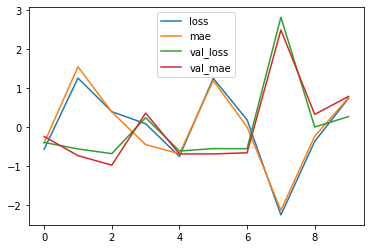

In [160]:
q6_z.plot()

<AxesSubplot:>

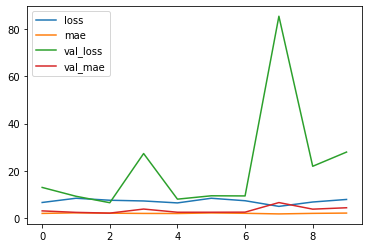

In [161]:
q6.plot()

## NN with single hidden layer and ReLU nonlinearity

Changing the dense_wt can work for any number of units

In [176]:
datafile = './housing.csv'
data = np.fromfile(datafile, sep=' ')
feature_num = 14
data = data.reshape([data.shape[0] // 14, 14])

x = []
for i in range(len(data)):
    temp = data[i][0:13].tolist()
    x.append(temp)
    
y = []
for j in range(len(data)):
    y.append(data[j][-1])
    
standar = StandardScaler()
standar.fit(x)
x = standar.transform(x)
x = x.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [177]:
hist_dict = []
for dense_wt in range (7):
    model1 = Sequential([
        Dense(2**dense_wt,activation="relu",input_shape=(13,),name="dense1"),
        Dense(1,name="dense5"),
    ])
    model1.compile(optimizer="adam",loss="mse",metrics=['mae'])
    model1.fit(x_train,y_train,batch_size=20,validation_data=(x_test,y_test),epochs=500)
    hist_dict.append(model1.history.history)



Epoch 1/500
18/18 [==============================] - 0s 6ms/step - loss: 597.3324 - mae: 22.6559 - val_loss: 609.3464 - val_mae: 23.0704
Epoch 2/500
18/18 [==============================] - 0s 3ms/step - loss: 595.4263 - mae: 22.6064 - val_loss: 607.8989 - val_mae: 23.0320
Epoch 3/500
18/18 [==============================] - 0s 3ms/step - loss: 593.6068 - mae: 22.5590 - val_loss: 606.5483 - val_mae: 22.9968
Epoch 4/500
18/18 [==============================] - 0s 3ms/step - loss: 591.9074 - mae: 22.5149 - val_loss: 605.2980 - val_mae: 22.9648
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 590.2975 - mae: 22.4737 - val_loss: 604.1257 - val_mae: 22.9355
Epoch 6/500
18/18 [==============================] - 0s 3ms/step - loss: 588.8409 - mae: 22.4367 - val_loss: 603.0115 - val_mae: 22.9078
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 587.4818 - mae: 22.4028 - val_loss: 601.9265 - val_mae: 22.8817
Epoch 8/500
18/18 [======================

18/18 [==============================] - 0s 2ms/step - loss: 377.6052 - mae: 15.9439 - val_loss: 432.8119 - val_mae: 17.4293
Epoch 120/500
18/18 [==============================] - 0s 2ms/step - loss: 375.2383 - mae: 15.8831 - val_loss: 430.1585 - val_mae: 17.3615
Epoch 121/500
18/18 [==============================] - 0s 2ms/step - loss: 372.7159 - mae: 15.8191 - val_loss: 427.7433 - val_mae: 17.2981
Epoch 122/500
18/18 [==============================] - 0s 2ms/step - loss: 370.3646 - mae: 15.7618 - val_loss: 424.8897 - val_mae: 17.2237
Epoch 123/500
18/18 [==============================] - 0s 3ms/step - loss: 367.8387 - mae: 15.6921 - val_loss: 422.0948 - val_mae: 17.1502
Epoch 124/500
18/18 [==============================] - 0s 3ms/step - loss: 365.3093 - mae: 15.6298 - val_loss: 419.2304 - val_mae: 17.0732
Epoch 125/500
18/18 [==============================] - 0s 3ms/step - loss: 362.7053 - mae: 15.5607 - val_loss: 416.3040 - val_mae: 16.9955
Epoch 126/500
18/18 [====================

18/18 [==============================] - 0s 2ms/step - loss: 226.8012 - mae: 11.9252 - val_loss: 233.5081 - val_mae: 12.0144
Epoch 179/500
18/18 [==============================] - 0s 3ms/step - loss: 224.1708 - mae: 11.8457 - val_loss: 230.1464 - val_mae: 11.9044
Epoch 180/500
18/18 [==============================] - 0s 3ms/step - loss: 221.6990 - mae: 11.7761 - val_loss: 226.6674 - val_mae: 11.7871
Epoch 181/500
18/18 [==============================] - 0s 3ms/step - loss: 219.2695 - mae: 11.7003 - val_loss: 223.0612 - val_mae: 11.6704
Epoch 182/500
18/18 [==============================] - 0s 2ms/step - loss: 216.6290 - mae: 11.6269 - val_loss: 219.7448 - val_mae: 11.5562
Epoch 183/500
18/18 [==============================] - 0s 3ms/step - loss: 213.9258 - mae: 11.5451 - val_loss: 216.3361 - val_mae: 11.4412
Epoch 184/500
18/18 [==============================] - 0s 3ms/step - loss: 211.2348 - mae: 11.4673 - val_loss: 212.4732 - val_mae: 11.3144
Epoch 185/500
18/18 [====================

Epoch 238/500
18/18 [==============================] - 0s 2ms/step - loss: 70.6207 - mae: 6.6064 - val_loss: 57.6635 - val_mae: 5.7973
Epoch 239/500
18/18 [==============================] - 0s 2ms/step - loss: 69.7989 - mae: 6.5594 - val_loss: 57.1076 - val_mae: 5.7709
Epoch 240/500
18/18 [==============================] - 0s 2ms/step - loss: 68.9085 - mae: 6.5123 - val_loss: 56.4142 - val_mae: 5.7348
Epoch 241/500
18/18 [==============================] - 0s 2ms/step - loss: 68.1096 - mae: 6.4655 - val_loss: 55.7895 - val_mae: 5.7051
Epoch 242/500
18/18 [==============================] - 0s 3ms/step - loss: 67.3129 - mae: 6.4205 - val_loss: 55.2157 - val_mae: 5.6761
Epoch 243/500
18/18 [==============================] - 0s 3ms/step - loss: 66.5489 - mae: 6.3759 - val_loss: 54.5886 - val_mae: 5.6411
Epoch 244/500
18/18 [==============================] - 0s 3ms/step - loss: 65.7506 - mae: 6.3296 - val_loss: 54.0194 - val_mae: 5.6110
Epoch 245/500
18/18 [==============================] - 

Epoch 299/500
18/18 [==============================] - 0s 3ms/step - loss: 39.3848 - mae: 4.6329 - val_loss: 37.2212 - val_mae: 4.6309
Epoch 300/500
18/18 [==============================] - 0s 3ms/step - loss: 39.1367 - mae: 4.6161 - val_loss: 37.0474 - val_mae: 4.6207
Epoch 301/500
18/18 [==============================] - 0s 3ms/step - loss: 38.8850 - mae: 4.5983 - val_loss: 36.9564 - val_mae: 4.6140
Epoch 302/500
18/18 [==============================] - 0s 3ms/step - loss: 38.6483 - mae: 4.5842 - val_loss: 36.8233 - val_mae: 4.6056
Epoch 303/500
18/18 [==============================] - 0s 2ms/step - loss: 38.4257 - mae: 4.5688 - val_loss: 36.6506 - val_mae: 4.5908
Epoch 304/500
18/18 [==============================] - 0s 3ms/step - loss: 38.1898 - mae: 4.5525 - val_loss: 36.5210 - val_mae: 4.5828
Epoch 305/500
18/18 [==============================] - 0s 3ms/step - loss: 37.9785 - mae: 4.5370 - val_loss: 36.3896 - val_mae: 4.5728
Epoch 306/500
18/18 [==============================] - 

Epoch 360/500
18/18 [==============================] - 0s 2ms/step - loss: 29.6076 - mae: 3.9538 - val_loss: 27.7143 - val_mae: 4.0403
Epoch 361/500
18/18 [==============================] - 0s 2ms/step - loss: 29.5218 - mae: 3.9459 - val_loss: 27.5319 - val_mae: 4.0259
Epoch 362/500
18/18 [==============================] - 0s 3ms/step - loss: 29.3981 - mae: 3.9392 - val_loss: 27.3846 - val_mae: 4.0138
Epoch 363/500
18/18 [==============================] - 0s 2ms/step - loss: 29.3050 - mae: 3.9287 - val_loss: 27.1947 - val_mae: 3.9987
Epoch 364/500
18/18 [==============================] - 0s 2ms/step - loss: 29.1874 - mae: 3.9209 - val_loss: 27.0991 - val_mae: 3.9915
Epoch 365/500
18/18 [==============================] - 0s 2ms/step - loss: 29.0598 - mae: 3.9103 - val_loss: 26.9170 - val_mae: 3.9772
Epoch 366/500
18/18 [==============================] - 0s 2ms/step - loss: 28.9508 - mae: 3.8998 - val_loss: 26.7310 - val_mae: 3.9643
Epoch 367/500
18/18 [==============================] - 

Epoch 421/500
18/18 [==============================] - 0s 2ms/step - loss: 25.6998 - mae: 3.6619 - val_loss: 22.6816 - val_mae: 3.6477
Epoch 422/500
18/18 [==============================] - 0s 2ms/step - loss: 25.6586 - mae: 3.6579 - val_loss: 22.6012 - val_mae: 3.6395
Epoch 423/500
18/18 [==============================] - 0s 2ms/step - loss: 25.6386 - mae: 3.6557 - val_loss: 22.5406 - val_mae: 3.6366
Epoch 424/500
18/18 [==============================] - 0s 3ms/step - loss: 25.5974 - mae: 3.6527 - val_loss: 22.5497 - val_mae: 3.6376
Epoch 425/500
18/18 [==============================] - 0s 2ms/step - loss: 25.5606 - mae: 3.6492 - val_loss: 22.5250 - val_mae: 3.6340
Epoch 426/500
18/18 [==============================] - 0s 2ms/step - loss: 25.5311 - mae: 3.6483 - val_loss: 22.4912 - val_mae: 3.6319
Epoch 427/500
18/18 [==============================] - 0s 3ms/step - loss: 25.5205 - mae: 3.6476 - val_loss: 22.4880 - val_mae: 3.6302
Epoch 428/500
18/18 [==============================] - 

Epoch 41/500
18/18 [==============================] - 0s 3ms/step - loss: 363.1610 - mae: 17.4469 - val_loss: 337.2419 - val_mae: 17.3193
Epoch 42/500
18/18 [==============================] - 0s 3ms/step - loss: 356.1730 - mae: 17.2502 - val_loss: 329.6791 - val_mae: 17.1138
Epoch 43/500
18/18 [==============================] - 0s 3ms/step - loss: 349.8145 - mae: 17.0625 - val_loss: 321.4972 - val_mae: 16.8885
Epoch 44/500
18/18 [==============================] - 0s 3ms/step - loss: 343.1338 - mae: 16.8602 - val_loss: 313.8761 - val_mae: 16.6739
Epoch 45/500
18/18 [==============================] - 0s 2ms/step - loss: 336.8278 - mae: 16.6696 - val_loss: 306.3548 - val_mae: 16.4563
Epoch 46/500
18/18 [==============================] - 0s 2ms/step - loss: 330.6477 - mae: 16.4751 - val_loss: 299.1429 - val_mae: 16.2429
Epoch 47/500
18/18 [==============================] - 0s 2ms/step - loss: 324.7595 - mae: 16.2857 - val_loss: 291.8871 - val_mae: 16.0244
Epoch 48/500
18/18 [==============

18/18 [==============================] - 0s 3ms/step - loss: 122.4102 - mae: 8.1416 - val_loss: 74.9708 - val_mae: 6.6181
Epoch 161/500
18/18 [==============================] - 0s 2ms/step - loss: 121.9410 - mae: 8.1217 - val_loss: 74.5496 - val_mae: 6.5995
Epoch 162/500
18/18 [==============================] - 0s 2ms/step - loss: 121.4553 - mae: 8.1002 - val_loss: 74.1565 - val_mae: 6.5838
Epoch 163/500
18/18 [==============================] - 0s 2ms/step - loss: 120.9889 - mae: 8.0774 - val_loss: 73.7736 - val_mae: 6.5674
Epoch 164/500
18/18 [==============================] - 0s 2ms/step - loss: 120.5703 - mae: 8.0583 - val_loss: 73.3719 - val_mae: 6.5524
Epoch 165/500
18/18 [==============================] - 0s 2ms/step - loss: 120.0783 - mae: 8.0353 - val_loss: 73.0128 - val_mae: 6.5367
Epoch 166/500
18/18 [==============================] - 0s 2ms/step - loss: 119.6550 - mae: 8.0153 - val_loss: 72.6661 - val_mae: 6.5226
Epoch 167/500
18/18 [==============================] - 0s 3ms/

Epoch 281/500
18/18 [==============================] - 0s 4ms/step - loss: 81.5485 - mae: 6.1187 - val_loss: 47.8113 - val_mae: 4.8598
Epoch 282/500
18/18 [==============================] - 0s 3ms/step - loss: 81.3023 - mae: 6.1063 - val_loss: 47.7030 - val_mae: 4.8541
Epoch 283/500
18/18 [==============================] - 0s 2ms/step - loss: 81.0296 - mae: 6.0929 - val_loss: 47.5294 - val_mae: 4.8419
Epoch 284/500
18/18 [==============================] - 0s 2ms/step - loss: 80.7841 - mae: 6.0834 - val_loss: 47.3475 - val_mae: 4.8321
Epoch 285/500
18/18 [==============================] - 0s 2ms/step - loss: 80.5092 - mae: 6.0701 - val_loss: 47.2229 - val_mae: 4.8265
Epoch 286/500
18/18 [==============================] - 0s 3ms/step - loss: 80.2657 - mae: 6.0595 - val_loss: 47.0345 - val_mae: 4.8144
Epoch 287/500
18/18 [==============================] - 0s 2ms/step - loss: 80.0252 - mae: 6.0488 - val_loss: 46.8530 - val_mae: 4.8018
Epoch 288/500
18/18 [==============================] - 

Epoch 342/500
18/18 [==============================] - 0s 2ms/step - loss: 62.4534 - mae: 5.4205 - val_loss: 37.0468 - val_mae: 4.4690
Epoch 343/500
18/18 [==============================] - 0s 2ms/step - loss: 61.7211 - mae: 5.4032 - val_loss: 36.8722 - val_mae: 4.4632
Epoch 344/500
18/18 [==============================] - 0s 2ms/step - loss: 60.8966 - mae: 5.3844 - val_loss: 36.7102 - val_mae: 4.4608
Epoch 345/500
18/18 [==============================] - 0s 2ms/step - loss: 60.1675 - mae: 5.3639 - val_loss: 36.4981 - val_mae: 4.4539
Epoch 346/500
18/18 [==============================] - 0s 2ms/step - loss: 59.3868 - mae: 5.3461 - val_loss: 36.3257 - val_mae: 4.4508
Epoch 347/500
18/18 [==============================] - 0s 2ms/step - loss: 58.5401 - mae: 5.3232 - val_loss: 36.1122 - val_mae: 4.4421
Epoch 348/500
18/18 [==============================] - 0s 2ms/step - loss: 57.7552 - mae: 5.3000 - val_loss: 35.8666 - val_mae: 4.4320
Epoch 349/500
18/18 [==============================] - 

Epoch 403/500
18/18 [==============================] - 0s 3ms/step - loss: 32.9159 - mae: 3.9895 - val_loss: 25.3792 - val_mae: 3.7336
Epoch 404/500
18/18 [==============================] - 0s 3ms/step - loss: 32.7051 - mae: 3.9772 - val_loss: 25.3607 - val_mae: 3.7323
Epoch 405/500
18/18 [==============================] - 0s 2ms/step - loss: 32.4654 - mae: 3.9662 - val_loss: 25.2339 - val_mae: 3.7233
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 32.2462 - mae: 3.9522 - val_loss: 25.1011 - val_mae: 3.7091
Epoch 407/500
18/18 [==============================] - 0s 2ms/step - loss: 32.0505 - mae: 3.9383 - val_loss: 25.0130 - val_mae: 3.6995
Epoch 408/500
18/18 [==============================] - 0s 2ms/step - loss: 31.8367 - mae: 3.9282 - val_loss: 24.9958 - val_mae: 3.7063
Epoch 409/500
18/18 [==============================] - 0s 2ms/step - loss: 31.6153 - mae: 3.9176 - val_loss: 24.8705 - val_mae: 3.6947
Epoch 410/500
18/18 [==============================] - 

Epoch 464/500
18/18 [==============================] - 0s 2ms/step - loss: 25.8132 - mae: 3.5477 - val_loss: 21.3333 - val_mae: 3.4754
Epoch 465/500
18/18 [==============================] - 0s 2ms/step - loss: 25.7119 - mae: 3.5384 - val_loss: 21.1797 - val_mae: 3.4557
Epoch 466/500
18/18 [==============================] - 0s 2ms/step - loss: 25.6649 - mae: 3.5336 - val_loss: 21.1133 - val_mae: 3.4600
Epoch 467/500
18/18 [==============================] - 0s 2ms/step - loss: 25.6056 - mae: 3.5285 - val_loss: 21.0462 - val_mae: 3.4544
Epoch 468/500
18/18 [==============================] - 0s 2ms/step - loss: 25.5439 - mae: 3.5239 - val_loss: 20.9986 - val_mae: 3.4483
Epoch 469/500
18/18 [==============================] - 0s 3ms/step - loss: 25.4710 - mae: 3.5173 - val_loss: 20.9047 - val_mae: 3.4462
Epoch 470/500
18/18 [==============================] - 0s 2ms/step - loss: 25.4035 - mae: 3.5131 - val_loss: 20.8304 - val_mae: 3.4412
Epoch 471/500
18/18 [==============================] - 

18/18 [==============================] - 0s 3ms/step - loss: 153.7310 - mae: 9.6238 - val_loss: 102.5865 - val_mae: 8.1120
Epoch 84/500
18/18 [==============================] - 0s 3ms/step - loss: 152.5260 - mae: 9.5638 - val_loss: 101.2661 - val_mae: 8.0376
Epoch 85/500
18/18 [==============================] - 0s 3ms/step - loss: 151.2058 - mae: 9.5006 - val_loss: 100.1608 - val_mae: 7.9777
Epoch 86/500
18/18 [==============================] - 0s 3ms/step - loss: 150.0652 - mae: 9.4410 - val_loss: 98.9148 - val_mae: 7.9082
Epoch 87/500
18/18 [==============================] - 0s 3ms/step - loss: 148.8549 - mae: 9.3821 - val_loss: 97.7956 - val_mae: 7.8467
Epoch 88/500
18/18 [==============================] - 0s 2ms/step - loss: 147.6946 - mae: 9.3271 - val_loss: 96.6734 - val_mae: 7.7838
Epoch 89/500
18/18 [==============================] - 0s 2ms/step - loss: 146.5307 - mae: 9.2668 - val_loss: 95.6502 - val_mae: 7.7248
Epoch 90/500
18/18 [==============================] - 0s 2ms/step

Epoch 204/500
18/18 [==============================] - 0s 3ms/step - loss: 49.5834 - mae: 5.0720 - val_loss: 33.6756 - val_mae: 4.1721
Epoch 205/500
18/18 [==============================] - 0s 2ms/step - loss: 48.6364 - mae: 5.0211 - val_loss: 33.2820 - val_mae: 4.1441
Epoch 206/500
18/18 [==============================] - 0s 2ms/step - loss: 47.6413 - mae: 4.9648 - val_loss: 32.8963 - val_mae: 4.1150
Epoch 207/500
18/18 [==============================] - 0s 2ms/step - loss: 46.7926 - mae: 4.9113 - val_loss: 32.4643 - val_mae: 4.0842
Epoch 208/500
18/18 [==============================] - 0s 2ms/step - loss: 45.8819 - mae: 4.8600 - val_loss: 32.1215 - val_mae: 4.0595
Epoch 209/500
18/18 [==============================] - 0s 2ms/step - loss: 45.0839 - mae: 4.8164 - val_loss: 31.7120 - val_mae: 4.0283
Epoch 210/500
18/18 [==============================] - 0s 2ms/step - loss: 44.3234 - mae: 4.7738 - val_loss: 31.3420 - val_mae: 4.0035
Epoch 211/500
18/18 [==============================] - 

Epoch 265/500
18/18 [==============================] - 0s 2ms/step - loss: 31.6143 - mae: 4.0130 - val_loss: 22.9360 - val_mae: 3.5168
Epoch 266/500
18/18 [==============================] - 0s 3ms/step - loss: 31.5050 - mae: 4.0046 - val_loss: 22.8409 - val_mae: 3.5112
Epoch 267/500
18/18 [==============================] - 0s 3ms/step - loss: 31.3910 - mae: 3.9966 - val_loss: 22.7465 - val_mae: 3.5068
Epoch 268/500
18/18 [==============================] - 0s 2ms/step - loss: 31.2588 - mae: 3.9873 - val_loss: 22.6321 - val_mae: 3.4969
Epoch 269/500
18/18 [==============================] - 0s 3ms/step - loss: 31.1534 - mae: 3.9790 - val_loss: 22.5506 - val_mae: 3.4911
Epoch 270/500
18/18 [==============================] - 0s 2ms/step - loss: 31.0657 - mae: 3.9716 - val_loss: 22.4494 - val_mae: 3.4836
Epoch 271/500
18/18 [==============================] - 0s 2ms/step - loss: 30.9599 - mae: 3.9658 - val_loss: 22.4045 - val_mae: 3.4868
Epoch 272/500
18/18 [==============================] - 

Epoch 326/500
18/18 [==============================] - 0s 3ms/step - loss: 22.8271 - mae: 3.3629 - val_loss: 15.9371 - val_mae: 3.0758
Epoch 327/500
18/18 [==============================] - 0s 3ms/step - loss: 22.7094 - mae: 3.3489 - val_loss: 15.7633 - val_mae: 3.0570
Epoch 328/500
18/18 [==============================] - 0s 3ms/step - loss: 22.6041 - mae: 3.3361 - val_loss: 15.6478 - val_mae: 3.0456
Epoch 329/500
18/18 [==============================] - 0s 2ms/step - loss: 22.4789 - mae: 3.3238 - val_loss: 15.5825 - val_mae: 3.0419
Epoch 330/500
18/18 [==============================] - 0s 2ms/step - loss: 22.3827 - mae: 3.3148 - val_loss: 15.5358 - val_mae: 3.0363
Epoch 331/500
18/18 [==============================] - 0s 2ms/step - loss: 22.2830 - mae: 3.3052 - val_loss: 15.4147 - val_mae: 3.0238
Epoch 332/500
18/18 [==============================] - 0s 2ms/step - loss: 22.2158 - mae: 3.2920 - val_loss: 15.3184 - val_mae: 3.0105
Epoch 333/500
18/18 [==============================] - 

Epoch 387/500
18/18 [==============================] - 0s 10ms/step - loss: 18.7259 - mae: 2.9979 - val_loss: 12.9975 - val_mae: 2.8131
Epoch 388/500
18/18 [==============================] - 0s 3ms/step - loss: 18.6765 - mae: 2.9890 - val_loss: 12.9301 - val_mae: 2.8029
Epoch 389/500
18/18 [==============================] - 0s 3ms/step - loss: 18.6417 - mae: 2.9856 - val_loss: 12.9303 - val_mae: 2.8044
Epoch 390/500
18/18 [==============================] - 0s 3ms/step - loss: 18.5957 - mae: 2.9812 - val_loss: 12.9416 - val_mae: 2.8081
Epoch 391/500
18/18 [==============================] - 0s 2ms/step - loss: 18.5597 - mae: 2.9821 - val_loss: 12.8915 - val_mae: 2.8024
Epoch 392/500
18/18 [==============================] - 0s 3ms/step - loss: 18.5308 - mae: 2.9808 - val_loss: 12.9233 - val_mae: 2.8086
Epoch 393/500
18/18 [==============================] - 0s 2ms/step - loss: 18.4961 - mae: 2.9799 - val_loss: 12.8736 - val_mae: 2.8034
Epoch 394/500
18/18 [==============================] -

Epoch 8/500
18/18 [==============================] - 0s 3ms/step - loss: 560.0216 - mae: 21.6413 - val_loss: 575.1159 - val_mae: 22.1680
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 552.3183 - mae: 21.4461 - val_loss: 567.3962 - val_mae: 21.9724
Epoch 10/500
18/18 [==============================] - 0s 3ms/step - loss: 544.2747 - mae: 21.2377 - val_loss: 559.0483 - val_mae: 21.7610
Epoch 11/500
18/18 [==============================] - 0s 3ms/step - loss: 535.6609 - mae: 21.0108 - val_loss: 550.5013 - val_mae: 21.5420
Epoch 12/500
18/18 [==============================] - 0s 2ms/step - loss: 526.6108 - mae: 20.7728 - val_loss: 541.4323 - val_mae: 21.3066
Epoch 13/500
18/18 [==============================] - 0s 2ms/step - loss: 517.0943 - mae: 20.5152 - val_loss: 532.0355 - val_mae: 21.0592
Epoch 14/500
18/18 [==============================] - 0s 3ms/step - loss: 507.1018 - mae: 20.2488 - val_loss: 522.3630 - val_mae: 20.8001
Epoch 15/500
18/18 [================

Epoch 68/500
18/18 [==============================] - 0s 2ms/step - loss: 45.1299 - mae: 4.7811 - val_loss: 39.6008 - val_mae: 4.7485
Epoch 69/500
18/18 [==============================] - 0s 2ms/step - loss: 43.9017 - mae: 4.7149 - val_loss: 38.4026 - val_mae: 4.6713
Epoch 70/500
18/18 [==============================] - 0s 2ms/step - loss: 42.8201 - mae: 4.6551 - val_loss: 37.2212 - val_mae: 4.5936
Epoch 71/500
18/18 [==============================] - 0s 2ms/step - loss: 41.8109 - mae: 4.6001 - val_loss: 36.1531 - val_mae: 4.5239
Epoch 72/500
18/18 [==============================] - 0s 2ms/step - loss: 40.8685 - mae: 4.5464 - val_loss: 35.1233 - val_mae: 4.4579
Epoch 73/500
18/18 [==============================] - 0s 2ms/step - loss: 39.9180 - mae: 4.4977 - val_loss: 34.2925 - val_mae: 4.4077
Epoch 74/500
18/18 [==============================] - 0s 2ms/step - loss: 39.1117 - mae: 4.4565 - val_loss: 33.4271 - val_mae: 4.3573
Epoch 75/500
18/18 [==============================] - 0s 2ms/s

Epoch 129/500
18/18 [==============================] - 0s 2ms/step - loss: 22.7694 - mae: 3.5879 - val_loss: 21.4430 - val_mae: 3.3719
Epoch 130/500
18/18 [==============================] - 0s 2ms/step - loss: 22.6517 - mae: 3.5811 - val_loss: 21.3543 - val_mae: 3.3691
Epoch 131/500
18/18 [==============================] - 0s 2ms/step - loss: 22.5474 - mae: 3.5769 - val_loss: 21.3681 - val_mae: 3.3711
Epoch 132/500
18/18 [==============================] - 0s 2ms/step - loss: 22.4336 - mae: 3.5691 - val_loss: 21.2985 - val_mae: 3.3678
Epoch 133/500
18/18 [==============================] - 0s 2ms/step - loss: 22.3442 - mae: 3.5587 - val_loss: 21.2457 - val_mae: 3.3647
Epoch 134/500
18/18 [==============================] - 0s 2ms/step - loss: 22.2490 - mae: 3.5593 - val_loss: 21.2592 - val_mae: 3.3679
Epoch 135/500
18/18 [==============================] - 0s 2ms/step - loss: 22.1296 - mae: 3.5475 - val_loss: 21.1917 - val_mae: 3.3612
Epoch 136/500
18/18 [==============================] - 

Epoch 190/500
18/18 [==============================] - 0s 2ms/step - loss: 18.0034 - mae: 3.1842 - val_loss: 18.1197 - val_mae: 3.1587
Epoch 191/500
18/18 [==============================] - 0s 2ms/step - loss: 17.9375 - mae: 3.1767 - val_loss: 18.1548 - val_mae: 3.1669
Epoch 192/500
18/18 [==============================] - 0s 3ms/step - loss: 17.8927 - mae: 3.1723 - val_loss: 18.0843 - val_mae: 3.1578
Epoch 193/500
18/18 [==============================] - 0s 2ms/step - loss: 17.8349 - mae: 3.1650 - val_loss: 17.9418 - val_mae: 3.1493
Epoch 194/500
18/18 [==============================] - 0s 2ms/step - loss: 17.7956 - mae: 3.1591 - val_loss: 17.8258 - val_mae: 3.1382
Epoch 195/500
18/18 [==============================] - 0s 2ms/step - loss: 17.7526 - mae: 3.1532 - val_loss: 17.8593 - val_mae: 3.1380
Epoch 196/500
18/18 [==============================] - 0s 2ms/step - loss: 17.6718 - mae: 3.1472 - val_loss: 17.8673 - val_mae: 3.1462
Epoch 197/500
18/18 [==============================] - 

Epoch 251/500
18/18 [==============================] - 0s 4ms/step - loss: 15.6356 - mae: 2.9262 - val_loss: 15.2035 - val_mae: 2.9262
Epoch 252/500
18/18 [==============================] - 0s 5ms/step - loss: 15.6499 - mae: 2.9286 - val_loss: 15.1810 - val_mae: 2.9183
Epoch 253/500
18/18 [==============================] - 0s 3ms/step - loss: 15.5924 - mae: 2.9230 - val_loss: 15.1849 - val_mae: 2.9195
Epoch 254/500
18/18 [==============================] - 0s 4ms/step - loss: 15.5493 - mae: 2.9212 - val_loss: 15.0252 - val_mae: 2.9071
Epoch 255/500
18/18 [==============================] - 0s 4ms/step - loss: 15.5507 - mae: 2.9179 - val_loss: 14.9598 - val_mae: 2.8991
Epoch 256/500
18/18 [==============================] - 0s 3ms/step - loss: 15.4729 - mae: 2.9077 - val_loss: 14.9626 - val_mae: 2.8989
Epoch 257/500
18/18 [==============================] - 0s 5ms/step - loss: 15.5134 - mae: 2.9169 - val_loss: 15.0847 - val_mae: 2.9182
Epoch 258/500
18/18 [==============================] - 

Epoch 312/500
18/18 [==============================] - 0s 3ms/step - loss: 14.1726 - mae: 2.7708 - val_loss: 13.3391 - val_mae: 2.7622
Epoch 313/500
18/18 [==============================] - 0s 3ms/step - loss: 14.1282 - mae: 2.7668 - val_loss: 13.2600 - val_mae: 2.7537
Epoch 314/500
18/18 [==============================] - 0s 3ms/step - loss: 14.1299 - mae: 2.7614 - val_loss: 13.2220 - val_mae: 2.7419
Epoch 315/500
18/18 [==============================] - 0s 2ms/step - loss: 14.0833 - mae: 2.7592 - val_loss: 13.2928 - val_mae: 2.7569
Epoch 316/500
18/18 [==============================] - 0s 2ms/step - loss: 14.0750 - mae: 2.7619 - val_loss: 13.2327 - val_mae: 2.7538
Epoch 317/500
18/18 [==============================] - 0s 2ms/step - loss: 14.0499 - mae: 2.7604 - val_loss: 13.2122 - val_mae: 2.7505
Epoch 318/500
18/18 [==============================] - 0s 2ms/step - loss: 14.0481 - mae: 2.7569 - val_loss: 13.2502 - val_mae: 2.7522
Epoch 319/500
18/18 [==============================] - 

Epoch 373/500
18/18 [==============================] - 0s 3ms/step - loss: 13.1748 - mae: 2.6633 - val_loss: 12.2596 - val_mae: 2.6590
Epoch 374/500
18/18 [==============================] - 0s 2ms/step - loss: 13.1290 - mae: 2.6649 - val_loss: 12.4098 - val_mae: 2.6826
Epoch 375/500
18/18 [==============================] - 0s 2ms/step - loss: 13.0683 - mae: 2.6615 - val_loss: 12.3134 - val_mae: 2.6691
Epoch 376/500
18/18 [==============================] - 0s 2ms/step - loss: 13.0795 - mae: 2.6607 - val_loss: 12.3152 - val_mae: 2.6703
Epoch 377/500
18/18 [==============================] - 0s 2ms/step - loss: 13.0418 - mae: 2.6560 - val_loss: 12.2695 - val_mae: 2.6629
Epoch 378/500
18/18 [==============================] - 0s 2ms/step - loss: 13.0323 - mae: 2.6514 - val_loss: 12.2271 - val_mae: 2.6589
Epoch 379/500
18/18 [==============================] - 0s 2ms/step - loss: 13.0481 - mae: 2.6567 - val_loss: 12.2554 - val_mae: 2.6655
Epoch 380/500
18/18 [==============================] - 

Epoch 434/500
18/18 [==============================] - 0s 2ms/step - loss: 12.3190 - mae: 2.5910 - val_loss: 11.8031 - val_mae: 2.6344
Epoch 435/500
18/18 [==============================] - 0s 2ms/step - loss: 12.2637 - mae: 2.5899 - val_loss: 11.7522 - val_mae: 2.6252
Epoch 436/500
18/18 [==============================] - 0s 2ms/step - loss: 12.2947 - mae: 2.5839 - val_loss: 11.6763 - val_mae: 2.6140
Epoch 437/500
18/18 [==============================] - 0s 3ms/step - loss: 12.2794 - mae: 2.5903 - val_loss: 11.7900 - val_mae: 2.6327
Epoch 438/500
18/18 [==============================] - 0s 2ms/step - loss: 12.2616 - mae: 2.5909 - val_loss: 11.7056 - val_mae: 2.6220
Epoch 439/500
18/18 [==============================] - 0s 2ms/step - loss: 12.2329 - mae: 2.5858 - val_loss: 11.7215 - val_mae: 2.6226
Epoch 440/500
18/18 [==============================] - 0s 3ms/step - loss: 12.2361 - mae: 2.5909 - val_loss: 11.7446 - val_mae: 2.6275
Epoch 441/500
18/18 [==============================] - 

Epoch 495/500
18/18 [==============================] - 0s 2ms/step - loss: 11.5588 - mae: 2.5159 - val_loss: 11.3018 - val_mae: 2.5838
Epoch 496/500
18/18 [==============================] - 0s 2ms/step - loss: 11.5598 - mae: 2.5194 - val_loss: 11.4008 - val_mae: 2.5973
Epoch 497/500
18/18 [==============================] - 0s 2ms/step - loss: 11.5092 - mae: 2.5100 - val_loss: 11.2919 - val_mae: 2.5760
Epoch 498/500
18/18 [==============================] - 0s 2ms/step - loss: 11.5134 - mae: 2.5055 - val_loss: 11.2665 - val_mae: 2.5736
Epoch 499/500
18/18 [==============================] - 0s 2ms/step - loss: 11.5017 - mae: 2.5105 - val_loss: 11.3010 - val_mae: 2.5846
Epoch 500/500
18/18 [==============================] - 0s 2ms/step - loss: 11.4911 - mae: 2.5123 - val_loss: 11.3046 - val_mae: 2.5834
Epoch 1/500
18/18 [==============================] - 0s 6ms/step - loss: 545.5562 - mae: 21.5557 - val_loss: 551.8469 - val_mae: 21.9153
Epoch 2/500
18/18 [==============================] - 

18/18 [==============================] - 0s 2ms/step - loss: 18.8495 - mae: 3.1802 - val_loss: 17.5245 - val_mae: 3.0843
Epoch 117/500
18/18 [==============================] - 0s 2ms/step - loss: 18.7383 - mae: 3.1658 - val_loss: 17.4402 - val_mae: 3.0718
Epoch 118/500
18/18 [==============================] - 0s 2ms/step - loss: 18.6390 - mae: 3.1619 - val_loss: 17.4139 - val_mae: 3.0733
Epoch 119/500
18/18 [==============================] - 0s 2ms/step - loss: 18.5305 - mae: 3.1509 - val_loss: 17.2818 - val_mae: 3.0612
Epoch 120/500
18/18 [==============================] - 0s 3ms/step - loss: 18.4149 - mae: 3.1410 - val_loss: 17.2804 - val_mae: 3.0665
Epoch 121/500
18/18 [==============================] - 0s 3ms/step - loss: 18.3296 - mae: 3.1390 - val_loss: 17.2180 - val_mae: 3.0607
Epoch 122/500
18/18 [==============================] - 0s 2ms/step - loss: 18.2498 - mae: 3.1310 - val_loss: 17.1768 - val_mae: 3.0588
Epoch 123/500
18/18 [==============================] - 0s 2ms/step - 

Epoch 177/500
18/18 [==============================] - 0s 3ms/step - loss: 14.3706 - mae: 2.7431 - val_loss: 13.5737 - val_mae: 2.7643
Epoch 178/500
18/18 [==============================] - 0s 2ms/step - loss: 14.3233 - mae: 2.7402 - val_loss: 13.5846 - val_mae: 2.7694
Epoch 179/500
18/18 [==============================] - 0s 2ms/step - loss: 14.2623 - mae: 2.7336 - val_loss: 13.4954 - val_mae: 2.7597
Epoch 180/500
18/18 [==============================] - 0s 3ms/step - loss: 14.2131 - mae: 2.7264 - val_loss: 13.4408 - val_mae: 2.7555
Epoch 181/500
18/18 [==============================] - 0s 2ms/step - loss: 14.1751 - mae: 2.7256 - val_loss: 13.3909 - val_mae: 2.7555
Epoch 182/500
18/18 [==============================] - 0s 2ms/step - loss: 14.1334 - mae: 2.7198 - val_loss: 13.3875 - val_mae: 2.7552
Epoch 183/500
18/18 [==============================] - 0s 2ms/step - loss: 14.0606 - mae: 2.7130 - val_loss: 13.2820 - val_mae: 2.7456
Epoch 184/500
18/18 [==============================] - 

Epoch 238/500
18/18 [==============================] - 0s 2ms/step - loss: 11.9020 - mae: 2.4802 - val_loss: 11.0514 - val_mae: 2.5225
Epoch 239/500
18/18 [==============================] - 0s 2ms/step - loss: 11.9033 - mae: 2.4792 - val_loss: 11.0545 - val_mae: 2.5242
Epoch 240/500
18/18 [==============================] - 0s 2ms/step - loss: 11.8789 - mae: 2.4771 - val_loss: 11.0758 - val_mae: 2.5295
Epoch 241/500
18/18 [==============================] - 0s 2ms/step - loss: 11.8328 - mae: 2.4735 - val_loss: 10.9728 - val_mae: 2.5137
Epoch 242/500
18/18 [==============================] - 0s 2ms/step - loss: 11.8395 - mae: 2.4776 - val_loss: 10.9276 - val_mae: 2.5112
Epoch 243/500
18/18 [==============================] - 0s 2ms/step - loss: 11.7578 - mae: 2.4637 - val_loss: 10.8533 - val_mae: 2.4985
Epoch 244/500
18/18 [==============================] - 0s 2ms/step - loss: 11.7492 - mae: 2.4580 - val_loss: 10.8550 - val_mae: 2.4990
Epoch 245/500
18/18 [==============================] - 

Epoch 299/500
18/18 [==============================] - 0s 2ms/step - loss: 10.5835 - mae: 2.3275 - val_loss: 9.8230 - val_mae: 2.3800
Epoch 300/500
18/18 [==============================] - 0s 2ms/step - loss: 10.5512 - mae: 2.3267 - val_loss: 9.8598 - val_mae: 2.3830
Epoch 301/500
18/18 [==============================] - 0s 2ms/step - loss: 10.5341 - mae: 2.3232 - val_loss: 9.9323 - val_mae: 2.3890
Epoch 302/500
18/18 [==============================] - 0s 2ms/step - loss: 10.5554 - mae: 2.3198 - val_loss: 9.8017 - val_mae: 2.3731
Epoch 303/500
18/18 [==============================] - 0s 3ms/step - loss: 10.5382 - mae: 2.3204 - val_loss: 9.8709 - val_mae: 2.3842
Epoch 304/500
18/18 [==============================] - 0s 2ms/step - loss: 10.5399 - mae: 2.3221 - val_loss: 9.9069 - val_mae: 2.3880
Epoch 305/500
18/18 [==============================] - 0s 2ms/step - loss: 10.4844 - mae: 2.3141 - val_loss: 9.7612 - val_mae: 2.3683
Epoch 306/500
18/18 [==============================] - 0s 2ms/

Epoch 422/500
18/18 [==============================] - 0s 3ms/step - loss: 9.3416 - mae: 2.1626 - val_loss: 9.2196 - val_mae: 2.3038
Epoch 423/500
18/18 [==============================] - 0s 2ms/step - loss: 9.3385 - mae: 2.1613 - val_loss: 9.2735 - val_mae: 2.3125
Epoch 424/500
18/18 [==============================] - 0s 3ms/step - loss: 9.3251 - mae: 2.1606 - val_loss: 9.2695 - val_mae: 2.3095
Epoch 425/500
18/18 [==============================] - 0s 3ms/step - loss: 9.3638 - mae: 2.1607 - val_loss: 9.3721 - val_mae: 2.3250
Epoch 426/500
18/18 [==============================] - 0s 3ms/step - loss: 9.3051 - mae: 2.1576 - val_loss: 9.2395 - val_mae: 2.3075
Epoch 427/500
18/18 [==============================] - 0s 2ms/step - loss: 9.3492 - mae: 2.1566 - val_loss: 9.0898 - val_mae: 2.2836
Epoch 428/500
18/18 [==============================] - 0s 3ms/step - loss: 9.3002 - mae: 2.1580 - val_loss: 9.3175 - val_mae: 2.3186
Epoch 429/500
18/18 [==============================] - 0s 2ms/step - 

Epoch 44/500
18/18 [==============================] - 0s 2ms/step - loss: 28.8286 - mae: 3.9562 - val_loss: 22.5675 - val_mae: 3.5938
Epoch 45/500
18/18 [==============================] - 0s 2ms/step - loss: 28.0130 - mae: 3.9059 - val_loss: 22.1089 - val_mae: 3.5523
Epoch 46/500
18/18 [==============================] - 0s 3ms/step - loss: 27.4177 - mae: 3.8584 - val_loss: 21.7839 - val_mae: 3.5205
Epoch 47/500
18/18 [==============================] - 0s 3ms/step - loss: 26.9287 - mae: 3.8200 - val_loss: 21.4784 - val_mae: 3.4915
Epoch 48/500
18/18 [==============================] - 0s 2ms/step - loss: 26.4711 - mae: 3.7896 - val_loss: 21.3150 - val_mae: 3.4791
Epoch 49/500
18/18 [==============================] - 0s 3ms/step - loss: 26.0065 - mae: 3.7608 - val_loss: 21.1031 - val_mae: 3.4590
Epoch 50/500
18/18 [==============================] - 0s 3ms/step - loss: 25.6192 - mae: 3.7263 - val_loss: 20.8991 - val_mae: 3.4420
Epoch 51/500
18/18 [==============================] - 0s 3ms/s

18/18 [==============================] - 0s 3ms/step - loss: 15.9441 - mae: 2.9146 - val_loss: 15.1627 - val_mae: 3.0090
Epoch 106/500
18/18 [==============================] - 0s 3ms/step - loss: 15.8325 - mae: 2.9005 - val_loss: 15.0615 - val_mae: 3.0006
Epoch 107/500
18/18 [==============================] - 0s 3ms/step - loss: 15.7591 - mae: 2.8933 - val_loss: 15.0491 - val_mae: 3.0015
Epoch 108/500
18/18 [==============================] - 0s 2ms/step - loss: 15.6397 - mae: 2.8815 - val_loss: 14.8302 - val_mae: 2.9745
Epoch 109/500
18/18 [==============================] - 0s 2ms/step - loss: 15.5670 - mae: 2.8695 - val_loss: 14.7357 - val_mae: 2.9596
Epoch 110/500
18/18 [==============================] - 0s 3ms/step - loss: 15.5474 - mae: 2.8659 - val_loss: 14.6933 - val_mae: 2.9615
Epoch 111/500
18/18 [==============================] - 0s 3ms/step - loss: 15.3552 - mae: 2.8506 - val_loss: 14.5373 - val_mae: 2.9428
Epoch 112/500
18/18 [==============================] - 0s 2ms/step - 

Epoch 166/500
18/18 [==============================] - 0s 3ms/step - loss: 11.5404 - mae: 2.4229 - val_loss: 10.8557 - val_mae: 2.5456
Epoch 167/500
18/18 [==============================] - 0s 2ms/step - loss: 11.5005 - mae: 2.4199 - val_loss: 10.9045 - val_mae: 2.5515
Epoch 168/500
18/18 [==============================] - 0s 2ms/step - loss: 11.4597 - mae: 2.4191 - val_loss: 10.8045 - val_mae: 2.5398
Epoch 169/500
18/18 [==============================] - 0s 2ms/step - loss: 11.4444 - mae: 2.4105 - val_loss: 10.6974 - val_mae: 2.5253
Epoch 170/500
18/18 [==============================] - 0s 2ms/step - loss: 11.3712 - mae: 2.4065 - val_loss: 10.7429 - val_mae: 2.5345
Epoch 171/500
18/18 [==============================] - 0s 2ms/step - loss: 11.3321 - mae: 2.4007 - val_loss: 10.7118 - val_mae: 2.5288
Epoch 172/500
18/18 [==============================] - 0s 3ms/step - loss: 11.3060 - mae: 2.4013 - val_loss: 10.7593 - val_mae: 2.5350
Epoch 173/500
18/18 [==============================] - 

18/18 [==============================] - 0s 3ms/step - loss: 9.6295 - mae: 2.2074 - val_loss: 9.3555 - val_mae: 2.3594
Epoch 228/500
18/18 [==============================] - 0s 2ms/step - loss: 9.6674 - mae: 2.2125 - val_loss: 9.3817 - val_mae: 2.3685
Epoch 229/500
18/18 [==============================] - 0s 2ms/step - loss: 9.6203 - mae: 2.2108 - val_loss: 9.3505 - val_mae: 2.3603
Epoch 230/500
18/18 [==============================] - 0s 3ms/step - loss: 9.6118 - mae: 2.2082 - val_loss: 9.2592 - val_mae: 2.3492
Epoch 231/500
18/18 [==============================] - 0s 3ms/step - loss: 9.6278 - mae: 2.2046 - val_loss: 9.3354 - val_mae: 2.3606
Epoch 232/500
18/18 [==============================] - 0s 2ms/step - loss: 9.5865 - mae: 2.2047 - val_loss: 9.2911 - val_mae: 2.3526
Epoch 233/500
18/18 [==============================] - 0s 2ms/step - loss: 9.4901 - mae: 2.1945 - val_loss: 9.3257 - val_mae: 2.3585
Epoch 234/500
18/18 [==============================] - 0s 3ms/step - loss: 9.5046 -

Epoch 289/500
18/18 [==============================] - 0s 2ms/step - loss: 8.6196 - mae: 2.0865 - val_loss: 8.8693 - val_mae: 2.3070
Epoch 290/500
18/18 [==============================] - 0s 3ms/step - loss: 8.5404 - mae: 2.0786 - val_loss: 8.9186 - val_mae: 2.3144
Epoch 291/500
18/18 [==============================] - 0s 3ms/step - loss: 8.5480 - mae: 2.0812 - val_loss: 8.8758 - val_mae: 2.3086
Epoch 292/500
18/18 [==============================] - 0s 2ms/step - loss: 8.5224 - mae: 2.0759 - val_loss: 8.8381 - val_mae: 2.2994
Epoch 293/500
18/18 [==============================] - 0s 2ms/step - loss: 8.4984 - mae: 2.0767 - val_loss: 8.8249 - val_mae: 2.2979
Epoch 294/500
18/18 [==============================] - 0s 3ms/step - loss: 8.4536 - mae: 2.0689 - val_loss: 8.8306 - val_mae: 2.2985
Epoch 295/500
18/18 [==============================] - 0s 3ms/step - loss: 8.4420 - mae: 2.0694 - val_loss: 8.8337 - val_mae: 2.3018
Epoch 296/500
18/18 [==============================] - 0s 3ms/step - 

Epoch 412/500
18/18 [==============================] - 0s 3ms/step - loss: 7.1982 - mae: 1.8996 - val_loss: 8.7365 - val_mae: 2.2599
Epoch 413/500
18/18 [==============================] - 0s 3ms/step - loss: 7.2513 - mae: 1.9184 - val_loss: 8.6357 - val_mae: 2.2451
Epoch 414/500
18/18 [==============================] - 0s 3ms/step - loss: 7.1932 - mae: 1.9082 - val_loss: 8.7235 - val_mae: 2.2604
Epoch 415/500
18/18 [==============================] - 0s 2ms/step - loss: 7.2182 - mae: 1.9076 - val_loss: 8.7494 - val_mae: 2.2626
Epoch 416/500
18/18 [==============================] - 0s 3ms/step - loss: 7.1955 - mae: 1.9020 - val_loss: 8.7623 - val_mae: 2.2609
Epoch 417/500
18/18 [==============================] - 0s 2ms/step - loss: 7.2832 - mae: 1.9123 - val_loss: 8.6962 - val_mae: 2.2530
Epoch 418/500
18/18 [==============================] - 0s 3ms/step - loss: 7.2146 - mae: 1.9053 - val_loss: 8.7700 - val_mae: 2.2653
Epoch 419/500
18/18 [==============================] - 0s 3ms/step - 

18/18 [==============================] - 0s 3ms/step - loss: 27.7788 - mae: 3.8573 - val_loss: 21.2568 - val_mae: 3.5296
Epoch 35/500
18/18 [==============================] - 0s 3ms/step - loss: 27.1553 - mae: 3.7994 - val_loss: 21.0082 - val_mae: 3.5029
Epoch 36/500
18/18 [==============================] - 0s 3ms/step - loss: 26.5933 - mae: 3.7660 - val_loss: 20.9073 - val_mae: 3.4872
Epoch 37/500
18/18 [==============================] - 0s 2ms/step - loss: 26.0877 - mae: 3.7339 - val_loss: 20.7309 - val_mae: 3.4669
Epoch 38/500
18/18 [==============================] - 0s 3ms/step - loss: 25.5769 - mae: 3.7037 - val_loss: 20.5438 - val_mae: 3.4487
Epoch 39/500
18/18 [==============================] - 0s 3ms/step - loss: 25.0800 - mae: 3.6589 - val_loss: 20.3089 - val_mae: 3.4190
Epoch 40/500
18/18 [==============================] - 0s 3ms/step - loss: 24.5716 - mae: 3.6321 - val_loss: 20.2966 - val_mae: 3.4226
Epoch 41/500
18/18 [==============================] - 0s 3ms/step - loss: 2

Epoch 156/500
18/18 [==============================] - 0s 4ms/step - loss: 9.6965 - mae: 2.1892 - val_loss: 9.8536 - val_mae: 2.4484
Epoch 157/500
18/18 [==============================] - 0s 4ms/step - loss: 9.6326 - mae: 2.1737 - val_loss: 9.7268 - val_mae: 2.4259
Epoch 158/500
18/18 [==============================] - 0s 5ms/step - loss: 9.5724 - mae: 2.1724 - val_loss: 9.8944 - val_mae: 2.4630
Epoch 159/500
18/18 [==============================] - 0s 4ms/step - loss: 9.5560 - mae: 2.1722 - val_loss: 9.7879 - val_mae: 2.4412
Epoch 160/500
18/18 [==============================] - 0s 4ms/step - loss: 9.5553 - mae: 2.1631 - val_loss: 9.7661 - val_mae: 2.4394
Epoch 161/500
18/18 [==============================] - 0s 4ms/step - loss: 9.5084 - mae: 2.1643 - val_loss: 9.5841 - val_mae: 2.4092
Epoch 162/500
18/18 [==============================] - 0s 3ms/step - loss: 9.5050 - mae: 2.1700 - val_loss: 9.7154 - val_mae: 2.4403
Epoch 163/500
18/18 [==============================] - 0s 3ms/step - 

Epoch 279/500
18/18 [==============================] - 0s 3ms/step - loss: 6.8749 - mae: 1.8557 - val_loss: 8.5510 - val_mae: 2.2525
Epoch 280/500
18/18 [==============================] - 0s 3ms/step - loss: 6.8118 - mae: 1.8501 - val_loss: 8.6761 - val_mae: 2.2659
Epoch 281/500
18/18 [==============================] - 0s 3ms/step - loss: 6.7443 - mae: 1.8361 - val_loss: 8.5182 - val_mae: 2.2441
Epoch 282/500
18/18 [==============================] - 0s 3ms/step - loss: 6.7867 - mae: 1.8478 - val_loss: 8.6454 - val_mae: 2.2732
Epoch 283/500
18/18 [==============================] - 0s 3ms/step - loss: 6.7017 - mae: 1.8287 - val_loss: 8.6111 - val_mae: 2.2594
Epoch 284/500
18/18 [==============================] - 0s 3ms/step - loss: 6.6993 - mae: 1.8292 - val_loss: 8.6217 - val_mae: 2.2622
Epoch 285/500
18/18 [==============================] - 0s 3ms/step - loss: 6.7109 - mae: 1.8284 - val_loss: 8.5298 - val_mae: 2.2452
Epoch 286/500
18/18 [==============================] - 0s 3ms/step - 

Epoch 402/500
18/18 [==============================] - 0s 3ms/step - loss: 5.3787 - mae: 1.6390 - val_loss: 8.6134 - val_mae: 2.2442
Epoch 403/500
18/18 [==============================] - 0s 2ms/step - loss: 5.2930 - mae: 1.6304 - val_loss: 8.5533 - val_mae: 2.2368
Epoch 404/500
18/18 [==============================] - 0s 3ms/step - loss: 5.2980 - mae: 1.6313 - val_loss: 8.6591 - val_mae: 2.2573
Epoch 405/500
18/18 [==============================] - 0s 3ms/step - loss: 5.2928 - mae: 1.6319 - val_loss: 8.5775 - val_mae: 2.2428
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 5.2686 - mae: 1.6281 - val_loss: 8.6489 - val_mae: 2.2564
Epoch 407/500
18/18 [==============================] - 0s 3ms/step - loss: 5.3225 - mae: 1.6342 - val_loss: 8.6002 - val_mae: 2.2496
Epoch 408/500
18/18 [==============================] - 0s 3ms/step - loss: 5.2955 - mae: 1.6259 - val_loss: 8.6795 - val_mae: 2.2553
Epoch 409/500
18/18 [==============================] - 0s 3ms/step - 

In [178]:
hist_dict[0].keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [179]:
final = []
for i in range(7):
    
    run = {}
    for keyVal in hist_dict[0].keys():
        number = hist_dict[i][keyVal][::-1][0]
        run[keyVal] = number
    final.append(run)

In [180]:
q6 = pd.DataFrame(final)

In [181]:

q6_z = q6.apply(zscore)

<AxesSubplot:>

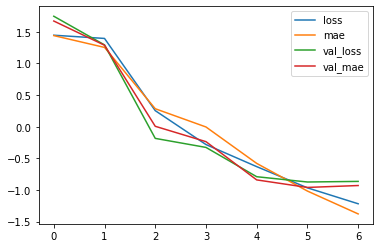

In [182]:
q6_z.plot()

## More General Code

In this part, I made a function.
The input parameters are:

layer height ---unit number

layer width --- layers number

epoch 

activation

input_shape --- input data shape

In [3]:
datafile = './housing.csv'
data = np.fromfile(datafile, sep=' ')
feature_num = 14
data = data.reshape([data.shape[0] // 14, 14])

x = []
for i in range(len(data)):
    temp = data[i][0:13].tolist()
    x.append(temp)
    
y = []
for j in range(len(data)):
    y.append(data[j][-1])
    
standar = StandardScaler()
standar.fit(x)
x = standar.transform(x)
x = x.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:


def general_model(layer_height,layer_width,epochs,activation,input_shape):

#     layer_height = 16 
#     layer_width = 12
    hist_dict = []
#     epochs= 100
#     activation = 'relu'
#     input_shape = (13,) 


    for layer_width_current in range(layer_width):

        model = keras.Sequential()
        model.add(Dense(layer_height,activation=activation,input_shape=input_shape))
        for layer_index in range(layer_width_current):
            model.add(Dense(layer_height,activation=activation))

        model.add(Dense(1))

        model.compile(optimizer="adam",loss="mse",metrics=['mae'])
        model.fit(x_train,y_train,batch_size=20,validation_data=(x_test,y_test),epochs=epochs)
        hist_dict.append(model.history.history)

    final = []
    for i in range(layer_width):
    
        run = {}
        for keyVal in hist_dict[0].keys():
            number = hist_dict[i][keyVal][::-1][0]
            run[keyVal] = number
        final.append(run)
    q6 = pd.DataFrame(final)
    q6_z = q6.apply(zscore)
    q6_z.plot()

The graphic of loss mae and val_loss val_mae are shown at the end of the output

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 594.9529 - mae: 22.6884 - val_loss: 585.1194 - val_mae: 22.3538
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 581.3081 - mae: 22.3963 - val_loss: 571.9646 - val_mae: 22.0635
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 568.0035 - mae: 22.1045 - val_loss: 559.2462 - val_mae: 21.7794
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 554.9658 - mae: 21.8112 - val_loss: 546.1757 - val_mae: 21.4830
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 541.5117 - mae: 21.5039 - val_loss: 532.9243 - val_mae: 21.1731
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 527.6400 - mae: 21.1839 - val_loss: 519.1612 - val_mae: 20.8511
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 513.1187 - mae: 20.8421 - val_loss: 504.2473 - val_mae: 20.4963
Epoch 8/100
18/18 [======================

18/18 [==============================] - 0s 2ms/step - loss: 28.9462 - mae: 3.9747 - val_loss: 26.0843 - val_mae: 3.7210
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 28.6369 - mae: 3.9535 - val_loss: 25.7961 - val_mae: 3.7046
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 28.3780 - mae: 3.9406 - val_loss: 25.4881 - val_mae: 3.6882
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 28.1137 - mae: 3.9215 - val_loss: 25.2243 - val_mae: 3.6716
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 27.8890 - mae: 3.9088 - val_loss: 24.9507 - val_mae: 3.6536
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 27.6742 - mae: 3.8934 - val_loss: 24.7159 - val_mae: 3.6361
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 27.4462 - mae: 3.8799 - val_loss: 24.4831 - val_mae: 3.6248
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 2

Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 31.3403 - mae: 4.1169 - val_loss: 35.4081 - val_mae: 4.1959
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 30.1282 - mae: 4.0322 - val_loss: 33.9538 - val_mae: 4.0908
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 29.2068 - mae: 3.9637 - val_loss: 32.6770 - val_mae: 3.9984
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 28.4218 - mae: 3.9213 - val_loss: 31.5700 - val_mae: 3.9340
Epoch 26/100
18/18 [==============================] - 0s 2ms/step - loss: 27.6456 - mae: 3.8614 - val_loss: 30.4238 - val_mae: 3.8460
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 26.8633 - mae: 3.8198 - val_loss: 29.4898 - val_mae: 3.7973
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 26.1387 - mae: 3.7703 - val_loss: 28.4575 - val_mae: 3.7205
Epoch 29/100
18/18 [==============================] - 0s 2ms/s

18/18 [==============================] - 0s 2ms/step - loss: 12.9567 - mae: 2.5680 - val_loss: 11.6391 - val_mae: 2.4038
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 12.8370 - mae: 2.5461 - val_loss: 11.6188 - val_mae: 2.4092
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 12.7537 - mae: 2.5304 - val_loss: 11.5342 - val_mae: 2.3987
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 12.6932 - mae: 2.5439 - val_loss: 11.4912 - val_mae: 2.4082
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 12.6327 - mae: 2.5190 - val_loss: 11.3685 - val_mae: 2.3589
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 12.6137 - mae: 2.5211 - val_loss: 11.3442 - val_mae: 2.4127
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 12.4658 - mae: 2.4976 - val_loss: 11.2571 - val_mae: 2.3648
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 1

18/18 [==============================] - 0s 2ms/step - loss: 14.5364 - mae: 2.6564 - val_loss: 13.9255 - val_mae: 2.5681
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 14.3830 - mae: 2.6353 - val_loss: 13.6765 - val_mae: 2.5328
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 14.2450 - mae: 2.6245 - val_loss: 13.5463 - val_mae: 2.5113
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 14.0961 - mae: 2.6130 - val_loss: 13.4964 - val_mae: 2.5334
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 14.1643 - mae: 2.6303 - val_loss: 13.3688 - val_mae: 2.5588
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 13.8706 - mae: 2.5977 - val_loss: 13.0986 - val_mae: 2.4662
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 13.8892 - mae: 2.5884 - val_loss: 13.1057 - val_mae: 2.5387
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 1

18/18 [==============================] - 0s 2ms/step - loss: 428.6220 - mae: 18.0762 - val_loss: 385.0037 - val_mae: 16.8403
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 307.7135 - mae: 14.8371 - val_loss: 263.1782 - val_mae: 13.6180
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 184.0135 - mae: 10.9426 - val_loss: 147.2417 - val_mae: 9.5432
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 101.2118 - mae: 7.5353 - val_loss: 87.6107 - val_mae: 6.9979
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 73.4360 - mae: 6.2841 - val_loss: 62.5321 - val_mae: 5.8175
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 54.0086 - mae: 5.3665 - val_loss: 48.1089 - val_mae: 5.1158
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 41.0576 - mae: 4.7739 - val_loss: 39.2977 - val_mae: 4.6869
Epoch 12/100
18/18 [==============================] - 0s 2ms/step -

18/18 [==============================] - 0s 2ms/step - loss: 10.4698 - mae: 2.2212 - val_loss: 10.4790 - val_mae: 2.4618
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 10.7068 - mae: 2.2549 - val_loss: 10.0788 - val_mae: 2.3911
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 10.3784 - mae: 2.2007 - val_loss: 10.0439 - val_mae: 2.3779
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 10.2919 - mae: 2.1942 - val_loss: 10.2088 - val_mae: 2.4143
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 10.0194 - mae: 2.1552 - val_loss: 10.0430 - val_mae: 2.3820
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 10.0873 - mae: 2.1888 - val_loss: 10.1138 - val_mae: 2.3877
Epoch 72/100
18/18 [==============================] - 0s 2ms/step - loss: 10.0177 - mae: 2.1571 - val_loss: 10.0955 - val_mae: 2.3817
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 9

18/18 [==============================] - 0s 2ms/step - loss: 15.7270 - mae: 2.7931 - val_loss: 16.0529 - val_mae: 2.8130
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 15.0711 - mae: 2.6799 - val_loss: 15.1745 - val_mae: 2.8139
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 13.7923 - mae: 2.5933 - val_loss: 14.7162 - val_mae: 2.6784
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 13.7977 - mae: 2.5664 - val_loss: 14.4765 - val_mae: 2.7542
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 13.7439 - mae: 2.5909 - val_loss: 13.8874 - val_mae: 2.6399
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 13.2908 - mae: 2.5448 - val_loss: 13.7401 - val_mae: 2.6198
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 12.7714 - mae: 2.4835 - val_loss: 13.2982 - val_mae: 2.6067
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 1

18/18 [==============================] - 0s 2ms/step - loss: 6.3904 - mae: 1.8220 - val_loss: 9.7974 - val_mae: 2.3745
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 6.4746 - mae: 1.8621 - val_loss: 9.9810 - val_mae: 2.3831
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 6.1441 - mae: 1.7807 - val_loss: 9.8548 - val_mae: 2.3783
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 6.2179 - mae: 1.8091 - val_loss: 10.3079 - val_mae: 2.4614
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 6.2466 - mae: 1.8026 - val_loss: 9.7298 - val_mae: 2.3379
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 6.0590 - mae: 1.7602 - val_loss: 9.6972 - val_mae: 2.3765
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 6.0094 - mae: 1.7751 - val_loss: 9.5719 - val_mae: 2.3408
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 6.0155 - mae: 

18/18 [==============================] - 0s 2ms/step - loss: 10.8134 - mae: 2.3911 - val_loss: 10.0520 - val_mae: 2.3489
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 10.6831 - mae: 2.3549 - val_loss: 9.4745 - val_mae: 2.2103
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 10.7646 - mae: 2.3974 - val_loss: 9.1153 - val_mae: 2.2314
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 10.4076 - mae: 2.3329 - val_loss: 9.1881 - val_mae: 2.2089
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 10.9486 - mae: 2.4103 - val_loss: 8.8060 - val_mae: 2.1626
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 10.2324 - mae: 2.2920 - val_loss: 9.0411 - val_mae: 2.1583
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 10.2669 - mae: 2.3395 - val_loss: 8.8337 - val_mae: 2.1784
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 9.9971 

Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 30.0659 - mae: 3.9458 - val_loss: 34.0445 - val_mae: 4.1528
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 28.5545 - mae: 3.8260 - val_loss: 31.8168 - val_mae: 3.9696
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 26.9170 - mae: 3.7222 - val_loss: 29.9375 - val_mae: 3.8159
Epoch 14/100
18/18 [==============================] - 0s 2ms/step - loss: 26.0462 - mae: 3.6873 - val_loss: 29.1087 - val_mae: 3.7827
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 25.2072 - mae: 3.5419 - val_loss: 26.9538 - val_mae: 3.6031
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 24.1050 - mae: 3.4768 - val_loss: 26.0724 - val_mae: 3.5472
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 23.3336 - mae: 3.4143 - val_loss: 24.8117 - val_mae: 3.4370
Epoch 18/100
18/18 [==============================] - 0s 2ms/s

18/18 [==============================] - 0s 2ms/step - loss: 7.5006 - mae: 1.9968 - val_loss: 10.5084 - val_mae: 2.5267
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 7.3980 - mae: 2.0029 - val_loss: 10.1883 - val_mae: 2.4941
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 7.1924 - mae: 1.9502 - val_loss: 10.3590 - val_mae: 2.5261
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 7.0743 - mae: 1.9271 - val_loss: 10.5705 - val_mae: 2.5763
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 7.0944 - mae: 1.9306 - val_loss: 11.9217 - val_mae: 2.7291
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 7.4021 - mae: 1.9615 - val_loss: 11.2303 - val_mae: 2.6443
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 7.4421 - mae: 2.0155 - val_loss: 10.9904 - val_mae: 2.6281
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 7.4388 -

18/18 [==============================] - 0s 3ms/step - loss: 10.7240 - mae: 2.3239 - val_loss: 10.2870 - val_mae: 2.4240
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 10.9896 - mae: 2.3702 - val_loss: 11.3311 - val_mae: 2.5230
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 11.1161 - mae: 2.3888 - val_loss: 10.8681 - val_mae: 2.4639
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 10.9236 - mae: 2.3631 - val_loss: 10.2248 - val_mae: 2.4528
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 10.0944 - mae: 2.2838 - val_loss: 10.1700 - val_mae: 2.4593
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 9.8309 - mae: 2.2230 - val_loss: 9.8851 - val_mae: 2.3993
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 9.8961 - mae: 2.2646 - val_loss: 10.1096 - val_mae: 2.4459
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 10.4

18/18 [==============================] - 0s 2ms/step - loss: 5.7011 - mae: 1.7233 - val_loss: 8.1366 - val_mae: 2.1883
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 5.6177 - mae: 1.7379 - val_loss: 8.0805 - val_mae: 2.1649
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss: 5.5554 - mae: 1.7289 - val_loss: 8.1483 - val_mae: 2.1718
Epoch 98/100
18/18 [==============================] - 0s 2ms/step - loss: 5.5131 - mae: 1.7334 - val_loss: 8.1149 - val_mae: 2.2022
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 5.3034 - mae: 1.6887 - val_loss: 8.3394 - val_mae: 2.2464
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 5.5764 - mae: 1.7224 - val_loss: 8.7120 - val_mae: 2.2673
Epoch 1/100
18/18 [==============================] - 0s 7ms/step - loss: 585.8289 - mae: 22.4520 - val_loss: 570.2531 - val_mae: 21.9301
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 549.6337 -

18/18 [==============================] - 0s 2ms/step - loss: 7.3237 - mae: 1.9863 - val_loss: 9.3504 - val_mae: 2.4405
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 6.8975 - mae: 1.9167 - val_loss: 9.5312 - val_mae: 2.4336
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 6.4787 - mae: 1.8135 - val_loss: 9.8866 - val_mae: 2.4985
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 6.5522 - mae: 1.8543 - val_loss: 10.0993 - val_mae: 2.5070
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 6.8313 - mae: 1.9290 - val_loss: 10.8903 - val_mae: 2.6535
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 6.2917 - mae: 1.8405 - val_loss: 9.2202 - val_mae: 2.3793
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 6.0436 - mae: 1.7735 - val_loss: 9.4845 - val_mae: 2.4086
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 6.0265 - mae:

Epoch 18/100
18/18 [==============================] - 0s 2ms/step - loss: 16.7495 - mae: 2.7139 - val_loss: 15.8755 - val_mae: 2.7523
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 16.9894 - mae: 2.8265 - val_loss: 15.6357 - val_mae: 2.6880
Epoch 20/100
18/18 [==============================] - 0s 2ms/step - loss: 16.2739 - mae: 2.6877 - val_loss: 15.1871 - val_mae: 2.6514
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 15.4904 - mae: 2.6753 - val_loss: 14.5199 - val_mae: 2.7143
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 15.5340 - mae: 2.6232 - val_loss: 14.0485 - val_mae: 2.6301
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 15.5711 - mae: 2.7089 - val_loss: 13.8945 - val_mae: 2.6592
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 15.0229 - mae: 2.5926 - val_loss: 14.1540 - val_mae: 2.6958
Epoch 25/100
18/18 [==============================] - 0s 2ms/s

18/18 [==============================] - 0s 2ms/step - loss: 6.3464 - mae: 1.8559 - val_loss: 10.5420 - val_mae: 2.4016
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 6.6624 - mae: 1.8745 - val_loss: 10.5123 - val_mae: 2.4182
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 5.9707 - mae: 1.7426 - val_loss: 11.2534 - val_mae: 2.5022
Epoch 82/100
18/18 [==============================] - -0s 2ms/step - loss: 6.4800 - mae: 1.8400 - val_loss: 10.6400 - val_mae: 2.4130
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 6.3891 - mae: 1.8178 - val_loss: 10.3641 - val_mae: 2.3713
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 5.7506 - mae: 1.7132 - val_loss: 10.4898 - val_mae: 2.3707
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 5.6787 - mae: 1.7085 - val_loss: 10.4243 - val_mae: 2.3776
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 5.6356 

18/18 [==============================] - 0s 2ms/step - loss: 7.9833 - mae: 2.0451 - val_loss: 10.3998 - val_mae: 2.4589
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 8.2837 - mae: 2.0951 - val_loss: 9.5110 - val_mae: 2.3585
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 7.9456 - mae: 2.0396 - val_loss: 9.6354 - val_mae: 2.4080
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 7.8054 - mae: 2.0557 - val_loss: 9.4692 - val_mae: 2.3617
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 8.0221 - mae: 2.0493 - val_loss: 9.5197 - val_mae: 2.4140
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 8.3262 - mae: 2.1436 - val_loss: 9.4718 - val_mae: 2.3896
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 7.7029 - mae: 2.0434 - val_loss: 9.5912 - val_mae: 2.4122
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 7.4482 - mae: 

18/18 [==============================] - 0s 3ms/step - loss: 565.1674 - mae: 21.9998 - val_loss: 525.4419 - val_mae: 20.8973
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 428.1295 - mae: 18.6591 - val_loss: 247.1507 - val_mae: 13.5296
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 134.2658 - mae: 8.9500 - val_loss: 83.3977 - val_mae: 6.7498
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 72.3193 - mae: 6.5615 - val_loss: 57.7784 - val_mae: 5.4756
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 50.9774 - mae: 5.2938 - val_loss: 46.7033 - val_mae: 4.7872
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 36.7433 - mae: 4.4813 - val_loss: 40.3617 - val_mae: 4.3464
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 30.1845 - mae: 4.0415 - val_loss: 35.2815 - val_mae: 4.0357
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss:

18/18 [==============================] - 0s 2ms/step - loss: 7.2243 - mae: 1.9744 - val_loss: 10.1439 - val_mae: 2.2841
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 7.2703 - mae: 1.9711 - val_loss: 10.6753 - val_mae: 2.3469
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 7.0651 - mae: 1.9826 - val_loss: 10.1446 - val_mae: 2.2874
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 7.0247 - mae: 1.9611 - val_loss: 10.0902 - val_mae: 2.2844
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 7.2793 - mae: 1.9890 - val_loss: 10.3038 - val_mae: 2.3181
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 6.6699 - mae: 1.9074 - val_loss: 10.8938 - val_mae: 2.3505
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 6.6360 - mae: 1.9046 - val_loss: 10.8979 - val_mae: 2.3657
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 6.2266 -

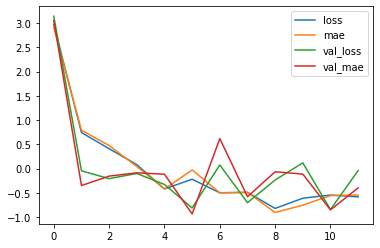

In [25]:
Gmodel = general_model(16,12,100,'relu',(13,))